# Does Population have an effect

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os.path
from sklearn.linear_model import LinearRegression 
import math

Loads in the dataset

In [2]:
filepath = '../../data/analysis/population_data.csv'

In [3]:
if not os.path.exists( filepath ):
    print("Missing dataset file")
else:
    df = pd.read_csv(filepath , encoding = "ISO-8859-1")
    print("File Read")

File Read


In [4]:
df.head()

,Unnamed: 0,Year,Host_City,Host_Country,Total_Males,Total_Females,Total_Athletes,Summer,Winter,Discipline,...,Country,Population,Males,Females,Life_Expectancy,Region,Elevation,Area_SqKM,Population_Density,Code
0,0,1960,Rome,ITA,4727,611,5338,True,False,Sailing,...,Argentina,20619075.0,10471009.0,10148066.0,65.215537,South America,595.6200,2775401.0,7.429224,ARG
1,1,1960,Rome,ITA,4727,611,5338,True,False,Sailing,...,Argentina,20619075.0,10471009.0,10148066.0,65.215537,South America,595.6200,2775401.0,7.429224,ARG
2,2,1960,Rome,ITA,4727,611,5338,True,False,Sailing,...,Argentina,20619075.0,10471009.0,10148066.0,65.215537,South America,595.6200,2775401.0,7.429224,ARG
3,3,1960,Rome,ITA,4727,611,5338,True,False,Boxing,...,Argentina,20619075.0,10471009.0,10148066.0,65.215537,South America,595.6200,2775401.0,7.429224,ARG
4,4,1960,Rome,ITA,4727,611,5338,True,False,Swimming,...,Australia,10276477.0,5191453.0,5085024.0,70.817073,Oceania,272.4731,7662592.0,1.341123,AUS


## Adding Column for Share of Medals and Rating won at a single games <br>
To quantify how successful countires are over different games in which different numbers of medals are given out we decided the best methof of comparison was to compare df.head()countries based on the share of medals won or ratings they won at a given Olympics, this gives us a method of comparrison between different games

In [5]:
df.columns

Index(['Unnamed: 0', 'Year', 'Host_City', 'Host_Country', 'Total_Males',
       'Total_Females', 'Total_Athletes', 'Summer', 'Winter', 'Discipline',
       'Sport', 'Ath_Name', 'Gender', 'NOC', 'Home_Adv', 'Gold', 'Silver',
       'Bronze', 'Total_Medals', 'NOC_Gold', 'NOC_Silver', 'NOC_Bronze',
       'NOC_Total_Medals', 'NOC_Rating', 'NOC_Rank', 'Ath_Rating', 'Ath_Rank',
       'Country', 'Population', 'Males', 'Females', 'Life_Expectancy',
       'Region', 'Elevation', 'Area_SqKM', 'Population_Density', 'Code'],
      dtype='object')

To work out the fraction of medals and ratings taken home by each country we must first work out the total number of medals and total ratings awarded at each Games

In [6]:
totMeds = df.groupby(['Year','Host_City'])[['Gold','Total_Medals','Ath_Rating']].sum()
totMeds.head(40)

Gold  Total_Medals  Ath_Rating
Year Host_City                                     
1960 Rome             295           882        1758
     Squaw Valley      50           147         295
1964 Innsbruck         60           185         372
     Tokyo            331          1013        2013
1968 Grenoble          66           199         401
     Mexico           341          1030        2051
1972 Munich           387          1184        2343
     Sapporo           70           200         404
1976 Innsbruck         70           210         420
     Montréal         429          1304        2591
1980 Lake Placid       72           218         436
     Moscow           454          1373        2732
1984 Los Angeles      496          1474        2942
     Sarajevo          74           222         444
1988 Calgary           88           264         528
     Seoul            506          1546        3063
1992 Albertville      107           324         648
     Barcelone        562          1712        3390
1994 Lillehammer      114           343         686
1996 Atlanta          615          1857        3696
1998 Nagano           149           447         892
2000 Sydney           669          2018        4023
2002 Salt Lake City   163           481         964
2004 Athens           658          1994        3968
2006 Turin            176           531        1061
2008 Beijing          666          2039        4036
2010 Vancouver        176           529        1058
2012 London           634          1944        3845
2014 Sochi            200           601        1198
2016 Rio              667          2021        4009

In [7]:
countryDF = df.groupby(['Country','Host_City','Year'])[['Gold', 'Silver','Bronze', 'Total_Medals','Ath_Rating']].sum()
countryDF = countryDF.reset_index()
countryDF.head(10)

,Country,Host_City,Year,Gold,Silver,Bronze,Total_Medals,Ath_Rating
0,Afghanistan,Beijing,2008,0,0,1,1,1
1,Afghanistan,London,2012,0,0,1,1,1
2,Algeria,Atlanta,1996,2,0,1,3,7
3,Algeria,Barcelone,1992,1,0,1,2,4
4,Algeria,Beijing,2008,0,1,1,2,3
5,Algeria,London,2012,1,0,0,1,3
6,Algeria,Los Angeles,1984,0,0,2,2,2
7,Algeria,Rio,2016,0,2,0,2,4
8,Algeria,Sydney,2000,1,1,3,5,8
9,Argentina,Athens,2004,26,0,21,47,99


In [8]:
countryDF['Gold_Share'] = countryDF.apply(lambda x: x.Gold/totMeds.loc[x.Year].loc[x.Host_City].Gold, axis=1 )
countryDF.head()

,Country,Host_City,Year,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share
0,Afghanistan,Beijing,2008,0,0,1,1,1,0.000000
1,Afghanistan,London,2012,0,0,1,1,1,0.000000
2,Algeria,Atlanta,1996,2,0,1,3,7,0.003252
3,Algeria,Barcelone,1992,1,0,1,2,4,0.001779
4,Algeria,Beijing,2008,0,1,1,2,3,0.000000


In [9]:
countryDF['Medal_Share'] = countryDF.apply(lambda x: x.Total_Medals/totMeds.loc[x.Year].loc[x.Host_City].Total_Medals, axis=1 )
countryDF.head()

,Country,Host_City,Year,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share
0,Afghanistan,Beijing,2008,0,0,1,1,1,0.000000,0.000490
1,Afghanistan,London,2012,0,0,1,1,1,0.000000,0.000514
2,Algeria,Atlanta,1996,2,0,1,3,7,0.003252,0.001616
3,Algeria,Barcelone,1992,1,0,1,2,4,0.001779,0.001168
4,Algeria,Beijing,2008,0,1,1,2,3,0.000000,0.000981


In [10]:
countryDF['Rating_Share'] = countryDF.apply(lambda x: x.Ath_Rating/totMeds.loc[x.Year].loc[x.Host_City].Ath_Rating, axis=1 )
countryDF.head()

,Country,Host_City,Year,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
0,Afghanistan,Beijing,2008,0,0,1,1,1,0.000000,0.000490,0.000248
1,Afghanistan,London,2012,0,0,1,1,1,0.000000,0.000514,0.000260
2,Algeria,Atlanta,1996,2,0,1,3,7,0.003252,0.001616,0.001894
3,Algeria,Barcelone,1992,1,0,1,2,4,0.001779,0.001168,0.001180
4,Algeria,Beijing,2008,0,1,1,2,3,0.000000,0.000981,0.000743


## Normalising Gold, Medal and Rating Share

### Normalising Golds

In [11]:
mx = countryDF['Gold_Share'].max()
mn = countryDF['Gold_Share'].min()

In [12]:
def normaliseGoldShare(val):
    return (val-mn)/(mx-mn)

In [13]:
countryDF['norm_Gold_Share'] = countryDF['Gold_Share'].apply(normaliseGoldShare)
countryDF.head()

,Country,Host_City,Year,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share,norm_Gold_Share
0,Afghanistan,Beijing,2008,0,0,1,1,1,0.000000,0.000490,0.000248,0.000000
1,Afghanistan,London,2012,0,0,1,1,1,0.000000,0.000514,0.000260,0.000000
2,Algeria,Atlanta,1996,2,0,1,3,7,0.003252,0.001616,0.001894,0.005991
3,Algeria,Barcelone,1992,1,0,1,2,4,0.001779,0.001168,0.001180,0.003278
4,Algeria,Beijing,2008,0,1,1,2,3,0.000000,0.000981,0.000743,0.000000


### Normalising Medal Share

In [14]:
mx = countryDF['Medal_Share'].max()
mn = countryDF['Medal_Share'].min()

In [15]:
def normaliseMedalShare(val):
    return (val-mn)/(mx-mn)

In [16]:
countryDF['norm_Medal_Share'] = countryDF['Medal_Share'].apply(normaliseMedalShare)
countryDF.head()

,Country,Host_City,Year,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share,norm_Gold_Share,norm_Medal_Share
0,Afghanistan,Beijing,2008,0,0,1,1,1,0.000000,0.000490,0.000248,0.000000,0.000000
1,Afghanistan,London,2012,0,0,1,1,1,0.000000,0.000514,0.000260,0.000000,0.000076
2,Algeria,Atlanta,1996,2,0,1,3,7,0.003252,0.001616,0.001894,0.005991,0.003573
3,Algeria,Barcelone,1992,1,0,1,2,4,0.001779,0.001168,0.001180,0.003278,0.002153
4,Algeria,Beijing,2008,0,1,1,2,3,0.000000,0.000981,0.000743,0.000000,0.001558


### Normalising Rating Share

In [17]:
mx = countryDF['Rating_Share'].max()
mn = countryDF['Rating_Share'].min()

In [18]:
def normaliseRatingShare(val):
    return (val-mn)/(mx-mn)

In [19]:
countryDF['norm_Rating_Share'] = countryDF['Rating_Share'].apply(normaliseRatingShare)
countryDF.head()

,Country,Host_City,Year,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share,norm_Gold_Share,norm_Medal_Share,norm_Rating_Share
0,Afghanistan,Beijing,2008,0,0,1,1,1,0.000000,0.000490,0.000248,0.000000,0.000000,0.000000
1,Afghanistan,London,2012,0,0,1,1,1,0.000000,0.000514,0.000260,0.000000,0.000076,0.000036
2,Algeria,Atlanta,1996,2,0,1,3,7,0.003252,0.001616,0.001894,0.005991,0.003573,0.004839
3,Algeria,Barcelone,1992,1,0,1,2,4,0.001779,0.001168,0.001180,0.003278,0.002153,0.002740
4,Algeria,Beijing,2008,0,1,1,2,3,0.000000,0.000981,0.000743,0.000000,0.001558,0.001457


# Add Population

In [20]:
popDF = df[['Year','Host_City','Country','Males','Females','Summer','Winter','Population_Density','Population']]
popDF = popDF.drop_duplicates()
popDF.head()

,Year,Host_City,Country,Males,Females,Summer,Winter,Population_Density,Population
0,1960,Rome,Argentina,10471009.0,10148066.0,True,False,7.429224,20619075.0
4,1960,Rome,Australia,5191453.0,5085024.0,True,False,1.341123,10276477.0
28,1960,Rome,Austria,3282797.0,3764742.0,True,False,83.004368,7047539.0
31,1960,Rome,Belgium,4503524.0,4649965.0,True,False,292.272576,9153489.0
35,1960,Rome,Brazil,35952077.0,36255477.0,True,False,8.575067,72207554.0


In [21]:
new_df = pd.merge(countryDF, popDF,  how='left', left_on=['Country','Host_City','Year'], right_on = ['Country','Host_City','Year'])
new_df.head()

,Country,Host_City,Year,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share,norm_Gold_Share,norm_Medal_Share,norm_Rating_Share,Males,Females,Summer,Winter,Population_Density,Population
0,Afghanistan,Beijing,2008,0,0,1,1,1,0.000000,0.000490,0.000248,0.000000,0.000000,0.000000,14054874.0,13239157.0,True,False,42.236961,27294031.0
1,Afghanistan,London,2012,0,0,1,1,1,0.000000,0.000514,0.000260,0.000000,0.000076,0.000036,15784301.0,14912657.0,True,False,47.502922,30696958.0
2,Algeria,Atlanta,1996,2,0,1,3,7,0.003252,0.001616,0.001894,0.005991,0.003573,0.004839,14898762.0,14512653.0,True,False,12.735059,29411415.0
3,Algeria,Barcelone,1992,1,0,1,2,4,0.001779,0.001168,0.001180,0.003278,0.002153,0.002740,13764639.0,13416455.0,True,False,11.769336,27181094.0
4,Algeria,Beijing,2008,0,1,1,2,3,0.000000,0.000981,0.000743,0.000000,0.001558,0.001457,17605574.0,17255141.0,True,False,15.094590,34860715.0


# Normalise Population

In [22]:
mx = new_df['Population'].max()
mn = new_df['Population'].min()

In [23]:
def normalisePopulation(val):
    return (val-mn)/(mx-mn)

In [24]:
new_df['norm_Population'] = new_df['Population'].apply(normalisePopulation)
new_df.head()

,Country,Host_City,Year,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,...,norm_Gold_Share,norm_Medal_Share,norm_Rating_Share,Males,Females,Summer,Winter,Population_Density,Population,norm_Population
0,Afghanistan,Beijing,2008,0,0,1,1,1,0.000000,0.000490,...,0.000000,0.000000,0.000000,14054874.0,13239157.0,True,False,42.236961,27294031.0,0.019780
1,Afghanistan,London,2012,0,0,1,1,1,0.000000,0.000514,...,0.000000,0.000076,0.000036,15784301.0,14912657.0,True,False,47.502922,30696958.0,0.022249
2,Algeria,Atlanta,1996,2,0,1,3,7,0.003252,0.001616,...,0.005991,0.003573,0.004839,14898762.0,14512653.0,True,False,12.735059,29411415.0,0.021316
3,Algeria,Barcelone,1992,1,0,1,2,4,0.001779,0.001168,...,0.003278,0.002153,0.002740,13764639.0,13416455.0,True,False,11.769336,27181094.0,0.019699
4,Algeria,Beijing,2008,0,1,1,2,3,0.000000,0.000981,...,0.000000,0.001558,0.001457,17605574.0,17255141.0,True,False,15.094590,34860715.0,0.025269


## Sets figure size

In [25]:
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:"+str(fig_size))

Current size:[6.0, 4.0]


In [26]:
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [27]:
def standardScatter(x,y,ytitle,xtitle,title):
    fig, ax = plt.subplots()
    ax.scatter(x,
                y,
                s=50,
                marker='o',
                facecolors='#DC143C', 
                edgecolors='#DC143C',
                )
    
    ax.set_ylabel(ytitle,fontsize=17)
    ax.set_xlabel(xtitle,fontsize=17)
    ax.set_title("\n"+title+"\n",fontsize=24)
    ax.locator_params(nbins=4)
    plt.tight_layout()
    plt.show()

In [28]:
def standardScatterWithRect(x,y,ytitle,xtitle,title,text,Rcorner,Rwidth,Rheight):
    fig, ax = plt.subplots()
    ax.scatter(x,
                y,
                s=50,
                marker='o',
                facecolors='#DC143C', 
                edgecolors='#DC143C',
                )
    ax.add_patch(
        patches.Rectangle(
            Rcorner,
            Rwidth,
            Rheight,
            fill=False
        )
    )
    ax.text(Rcorner[0]+Rwidth+.01, Rcorner[1]+(Rheight/2),text, color='Black', fontsize=15)
    
    ax.set_ylabel(ytitle,fontsize=17)
    ax.set_xlabel(xtitle,fontsize=17)
    ax.set_title("\n"+title+"\n",fontsize=24)
    ax.locator_params(nbins=4)
    plt.tight_layout()
    plt.show()

In [29]:
def standardScatterLine(x,y,ytitle,xtitle,title):
    x_nparray = (new_df['norm_Rating_Share'].values).reshape(len(x), 1)
    y_nparray = (new_df.norm_Population.values).reshape(len(y), 1)
    
    regr = LinearRegression()
    regr.fit(x_nparray, y_nparray)
    
    fig, ax = plt.subplots()
    
    ax.plot(x_nparray, regr.predict(x_nparray), color='k', linewidth=3)
    ax.scatter(x,
                y,
                marker='o',
                facecolors='#DC143C', 
                edgecolors='#DC143C',
                )
    
    ax.set_ylabel(ytitle,fontsize=17)
    ax.set_xlabel(xtitle,fontsize=17)
    ax.set_title("\n"+title+"\n",fontsize=24)
    ax.locator_params(nbins=4)
    plt.tight_layout()
    plt.show()

# Plots

## Normalised Share of Gold Medals

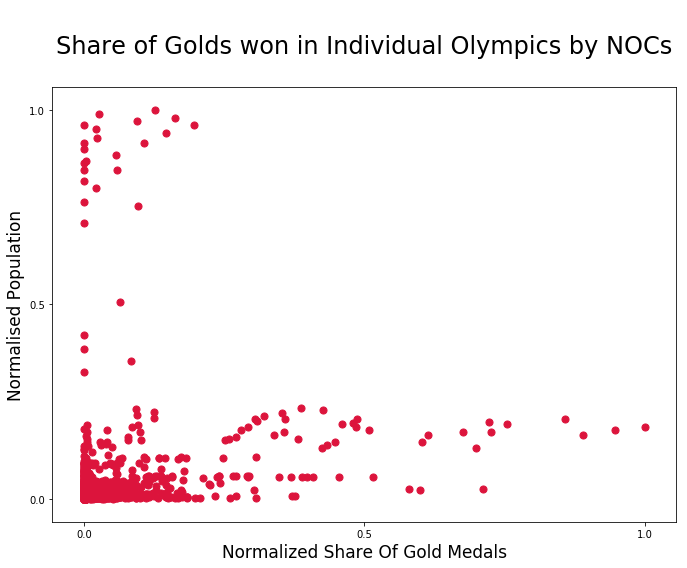

In [30]:
standardScatter(new_df['norm_Gold_Share'],
                new_df.norm_Population,
                "Normalised Population",
                "Normalized Share Of Gold Medals",
                "Share of Golds won in Individual Olympics by NOCs")

## Normalised Share of Medals Total

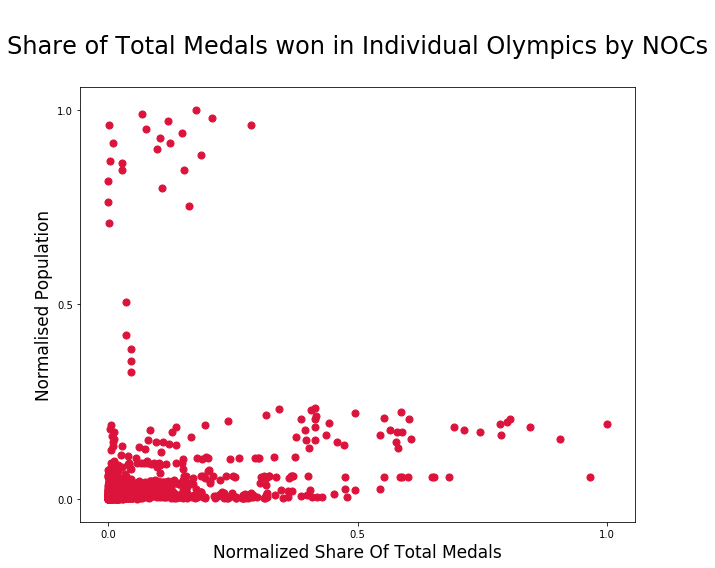

In [31]:
standardScatter(new_df['norm_Medal_Share'],
                new_df.norm_Population,
                "Normalised Population",
                "Normalized Share Of Total Medals",
                "Share of Total Medals won in Individual Olympics by NOCs")

In [37]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
test = new_df
df = sns.load_dataset(new_df, encoding = "ISO-8859-1")
g = sns.jointplot('norm_Medal_Share', "nor_Population", data=df, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)

UnicodeEncodeError: 'ascii' codec can't encode character '\xe9' in position 2734: ordinal not in range(128)

## Normalised Share of Ratings

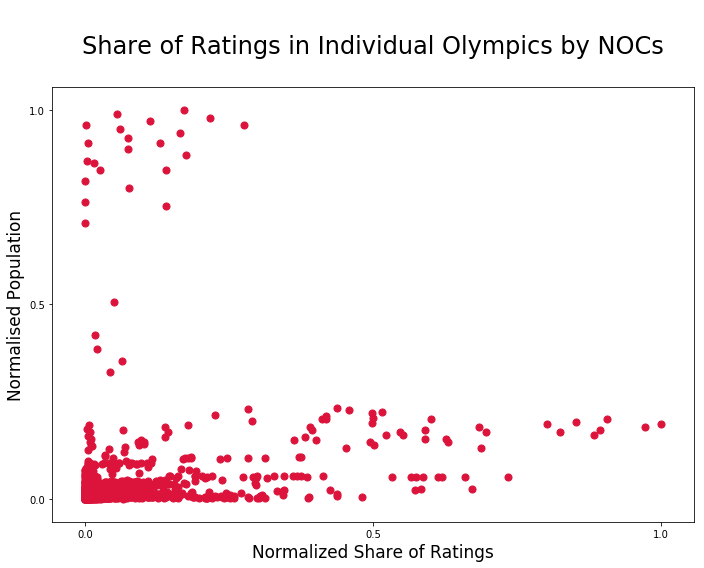

In [32]:
standardScatter(new_df.norm_Rating_Share,
                new_df.norm_Population,
                "Normalised Population",
                "Normalized Share of Ratings",
                "Share of Ratings in Individual Olympics by NOCs")

In [33]:
new_df[new_df.norm_Population > 0.25].Country.unique()

array(['China', 'India'], dtype=object)

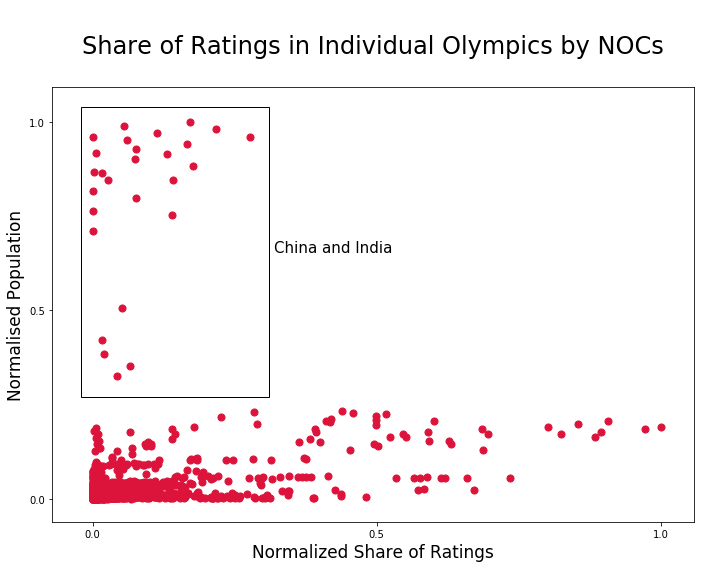

In [34]:
standardScatterWithRect(new_df.norm_Rating_Share,
                new_df.norm_Population,
                "Normalised Population",
                "Normalized Share of Ratings",
                "Share of Ratings in Individual Olympics by NOCs",
                "China and India",    
                (-0.02,0.27),
                .33,
                .77
                )

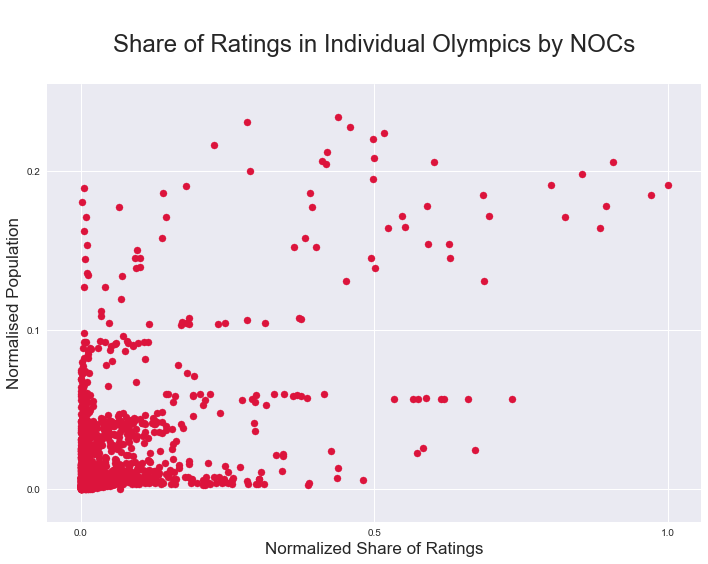

In [35]:
temp = new_df[new_df.norm_Population < .25]

standardScatter(temp.norm_Rating_Share,
                temp.norm_Population,
                "Normalised Population",
                "Normalized Share of Ratings",
                "Share of Ratings in Individual Olympics by NOCs")

## Correlation

In [42]:
new_df[['norm_Rating_Share','norm_Gold_Share','Medal_Share','Population']].corr()

,norm_Rating_Share,norm_Gold_Share,Medal_Share,Population
norm_Rating_Share,1.000000,0.936482,0.982356,0.197097
norm_Gold_Share,0.936482,1.000000,0.870444,0.187089
Medal_Share,0.982356,0.870444,1.000000,0.191914
Population,0.197097,0.187089,0.191914,1.000000


In [43]:
x = (new_df['norm_Rating_Share'].values).reshape(len(new_df), 1)
y = (new_df.norm_Population.values).reshape(len(new_df), 1)

In [44]:
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
model.intercept_

array([ 0.03232649])

In [46]:
model.coef_[0]

array([ 0.18361565])

In [47]:
temp = new_df[new_df.Country == 'Ireland']
temp[temp.Year == 2012]

,Country,Host_City,Year,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,...,norm_Gold_Share,norm_Medal_Share,norm_Rating_Share,Males,Females,Summer,Winter,Population_Density,Population,norm_Population
503,Ireland,London,2012,1,1,4,6,9,0.001577,0.003086,...,0.002906,0.008244,0.006153,2280652.0,2306245.0,True,False,67.636449,4586897.0,0.00331


In [48]:
x_unseen = 0.00331
model.predict(x_unseen)

array([[ 0.03293426]])

# Examining Trends

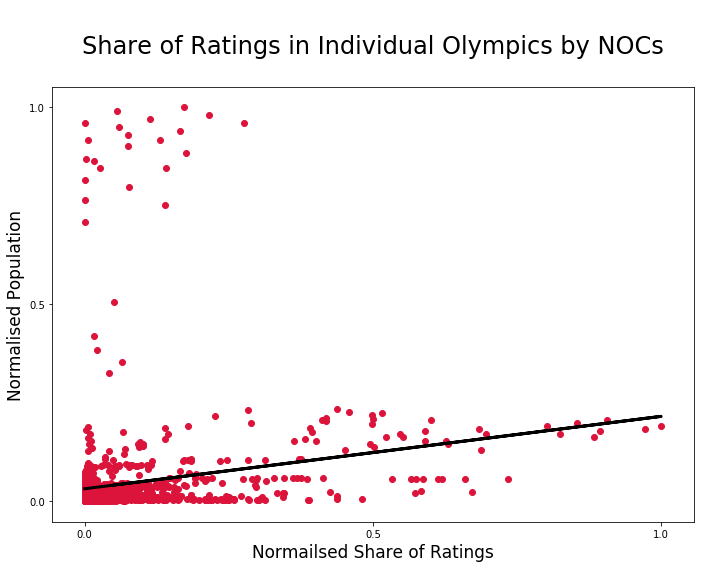

In [49]:
standardScatterLine(new_df.norm_Rating_Share,
                    new_df.norm_Population,
                    "Normalised Population",
                    "Normailsed Share of Ratings",
                    "Share of Ratings in Individual Olympics by NOCs")

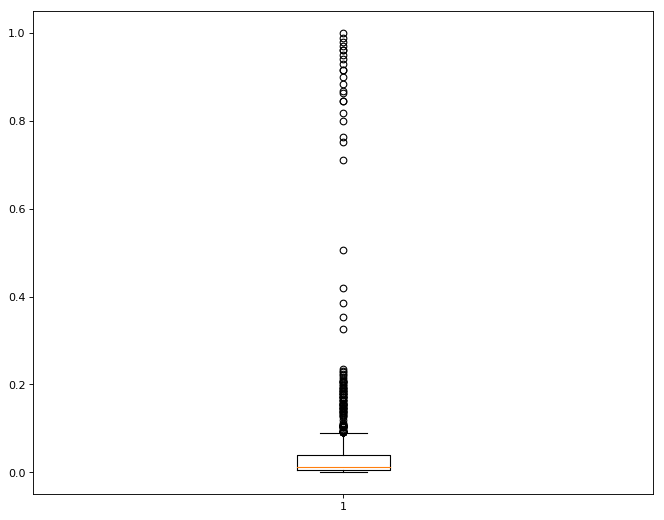

In [50]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(new_df.norm_Population)
plt.show()

# Normalising Population Density

In [51]:
new_df[new_df.Population_Density == new_df.Population_Density.max()]

,Country,Host_City,Year,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,...,norm_Gold_Share,norm_Medal_Share,norm_Rating_Share,Males,Females,Summer,Winter,Population_Density,Population,norm_Population
895,Singapore,Rio,2016,1,0,0,1,3,0.001499,0.000495,...,0.002762,0.000014,0.001471,2770103.0,2837180.0,True,False,8161.983988,5607283.0,0.00405


In [52]:
new_df[new_df.Population_Density == new_df.Population_Density.min()]

,Country,Host_City,Year,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,...,norm_Gold_Share,norm_Medal_Share,norm_Rating_Share,Males,Females,Summer,Winter,Population_Density,Population,norm_Population
695,Mongolia,Mexico,1968,0,1,3,4,5,0.0,0.003883,...,0.0,0.010776,0.006438,594389.0,612715.0,True,False,0.774571,1207104.0,0.000858


In [53]:
mn = new_df.Population_Density.min()
mx = new_df.Population_Density.max()

In [54]:
def normPopDensity(x):
    return (x-mn)/(mx-mn)

In [55]:
new_df['now_Population_Density'] = new_df.Population_Density.apply(normPopDensity)
new_df.head()

,Country,Host_City,Year,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,...,norm_Medal_Share,norm_Rating_Share,Males,Females,Summer,Winter,Population_Density,Population,norm_Population,now_Population_Density
0,Afghanistan,Beijing,2008,0,0,1,1,1,0.000000,0.000490,...,0.000000,0.000000,14054874.0,13239157.0,True,False,42.236961,27294031.0,0.019780,0.005080
1,Afghanistan,London,2012,0,0,1,1,1,0.000000,0.000514,...,0.000076,0.000036,15784301.0,14912657.0,True,False,47.502922,30696958.0,0.022249,0.005726
2,Algeria,Atlanta,1996,2,0,1,3,7,0.003252,0.001616,...,0.003573,0.004839,14898762.0,14512653.0,True,False,12.735059,29411415.0,0.021316,0.001466
3,Algeria,Barcelone,1992,1,0,1,2,4,0.001779,0.001168,...,0.002153,0.002740,13764639.0,13416455.0,True,False,11.769336,27181094.0,0.019699,0.001347
4,Algeria,Beijing,2008,0,1,1,2,3,0.000000,0.000981,...,0.001558,0.001457,17605574.0,17255141.0,True,False,15.094590,34860715.0,0.025269,0.001755


In [60]:
new_df.sort_values(['Population'],ascending=False)[['Country','Population']]

,Country,Host_City,Year,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,...,norm_Medal_Share,norm_Rating_Share,Males,Females,Summer,Winter,Population_Density,Population,norm_Population,now_Population_Density
206,China,Rio,2016,46,30,37,113,235,0.068966,0.055913,...,0.176013,0.171596,710373422.0,668291578.0,True,False,147.536105,1.378665e+09,1.000000,0.017983
209,China,Sochi,2014,3,4,6,13,23,0.015000,0.021631,...,0.067138,0.055711,702781045.0,661488955.0,False,True,145.995642,1.364270e+09,0.989559,0.017794
203,China,London,2012,56,44,28,128,284,0.088328,0.065844,...,0.207551,0.216410,695519169.0,655175831.0,True,False,144.542930,1.350695e+09,0.979712,0.017616
212,China,Vancouver,2010,9,3,8,20,41,0.051136,0.037807,...,0.118512,0.113195,688532785.0,649172215.0,False,True,143.152822,1.337705e+09,0.970290,0.017446
201,China,Beijing,2008,71,54,59,184,380,0.106607,0.090240,...,0.285031,0.276059,681538500.0,643116500.0,True,False,141.756292,1.324655e+09,0.960824,0.017275
474,India,Rio,2016,0,1,1,2,3,0.000000,0.000990,...,0.001585,0.001471,686291907.0,637879447.0,True,False,420.204977,1.324171e+09,0.960473,0.051393
211,China,Turin,2006,2,5,6,13,22,0.011364,0.024482,...,0.076194,0.060228,674246565.0,636773435.0,False,True,140.297160,1.311020e+09,0.950934,0.017096
198,China,Athens,2004,52,27,15,94,225,0.079027,0.047141,...,0.148156,0.165967,666239967.0,629835033.0,True,False,138.697840,1.296075e+09,0.940093,0.016900
207,China,Salt Lake City,2002,2,5,9,16,25,0.012270,0.033264,...,0.104084,0.075511,657832960.0,622567040.0,False,True,137.020399,1.280400e+09,0.928723,0.016694
470,India,London,2012,0,2,4,6,8,0.000000,0.003086,...,0.008244,0.005388,655027697.0,608038155.0,True,False,400.814106,1.263066e+09,0.916150,0.049017


In [57]:
temp

,Country,Host_City,Year,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,...,norm_Gold_Share,norm_Medal_Share,norm_Rating_Share,Males,Females,Summer,Winter,Population_Density,Population,norm_Population
500,Ireland,Atlanta,1996,3,0,1,4,10,0.004878,0.002154,...,0.008986,0.005283,0.007226,1807113.0,1830397.0,True,False,53.637189,3637510.0,0.002621
501,Ireland,Barcelone,1992,1,1,0,2,5,0.001779,0.001168,...,0.003278,0.002153,0.003608,1769498.0,1788932.0,True,False,52.471108,3558430.0,0.002564
502,Ireland,Beijing,2008,0,1,2,3,4,0.000000,0.001471,...,0.000000,0.003115,0.002185,2240444.0,2249100.0,True,False,66.200923,4489544.0,0.003239
503,Ireland,London,2012,1,1,4,6,9,0.001577,0.003086,...,0.002906,0.008244,0.006153,2280652.0,2306245.0,True,False,67.636449,4586897.0,0.003310
504,Ireland,Los Angeles,1984,0,1,0,1,2,0.000000,0.000678,...,0.000000,0.000597,0.001270,1768716.0,1763707.0,True,False,52.087620,3532423.0,0.002545
505,Ireland,Moscow,1980,0,2,1,3,5,0.000000,0.002185,...,0.000000,0.005382,0.004652,1714245.0,1698555.0,True,False,50.323710,3412800.0,0.002458
506,Ireland,Rio,2016,0,3,0,3,6,0.000000,0.001484,...,0.000000,0.003157,0.003671,2366890.0,2406205.0,True,False,70.382046,4773095.0,0.003445
507,Ireland,Sydney,2000,0,1,0,1,2,0.000000,0.000496,...,0.000000,0.000016,0.000733,1892566.0,1912608.0,True,False,56.109491,3805174.0,0.002743
508,Ireland,Tokyo,1964,0,0,1,1,1,0.000000,0.000987,...,0.000000,0.001578,0.000732,1439927.0,1426623.0,True,False,42.268938,2866550.0,0.002062
